In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('AAPL_train.csv')
train['Date'] = pd.to_datetime(train['Date'])
#adj_df = train.set_index('Date')[['Adj Close']]
adj_df = train[['Date','Adj Close']]
adj_df.head()

,Date,Adj Close
0,2019-01-02,37.845032
1,2019-01-03,34.075394
2,2019-01-04,35.530045
3,2019-01-07,35.450962
4,2019-01-08,36.126770


In [3]:
adj_df.rename(columns={'Date':'ds','Adj Close': 'y'},inplace=True)

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_13140\3423737004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_df.rename(columns={'Date':'ds','Adj Close': 'y'},inplace=True)


In [4]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model = Prophet(daily_seasonality=True)
model.fit(adj_df)

23:59:21 - cmdstanpy - INFO - Chain [1] start processing
23:59:24 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
forecast_df = model.make_future_dataframe(periods=50,freq='D')
forecast_df

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
1323,2024-03-16
1324,2024-03-17
1325,2024-03-18
1326,2024-03-19


In [7]:
forecast = model.predict(forecast_df)

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



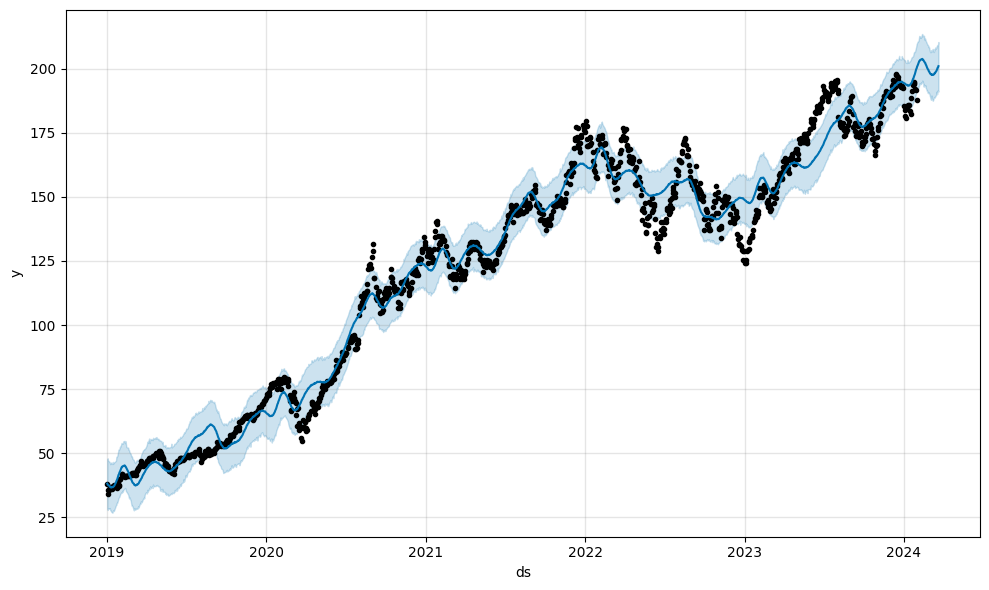

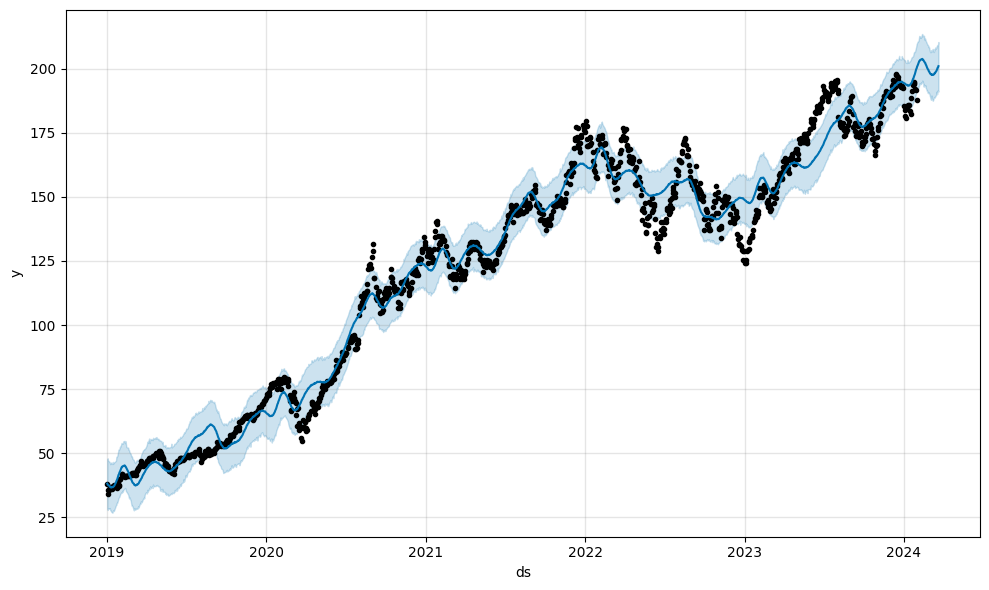

In [8]:
model.plot(forecast,uncertainty=True)

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

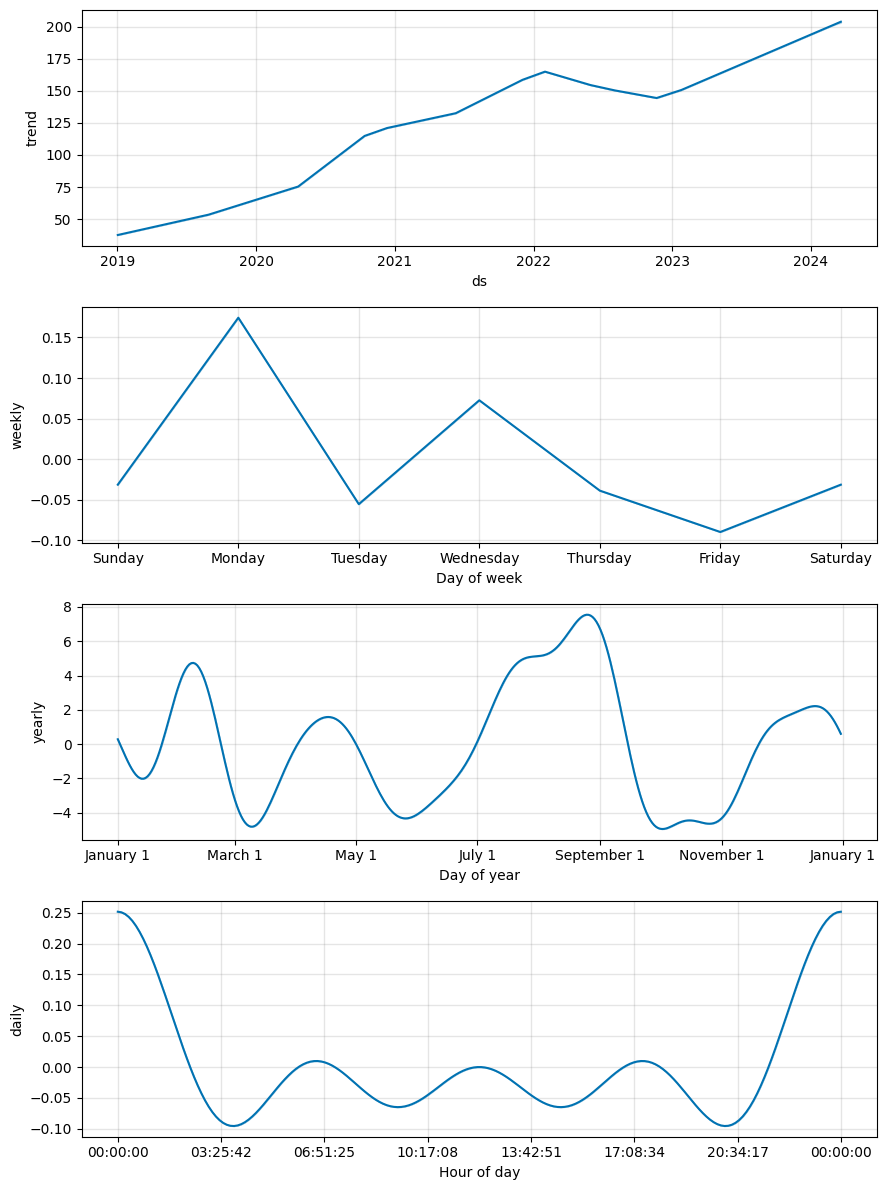

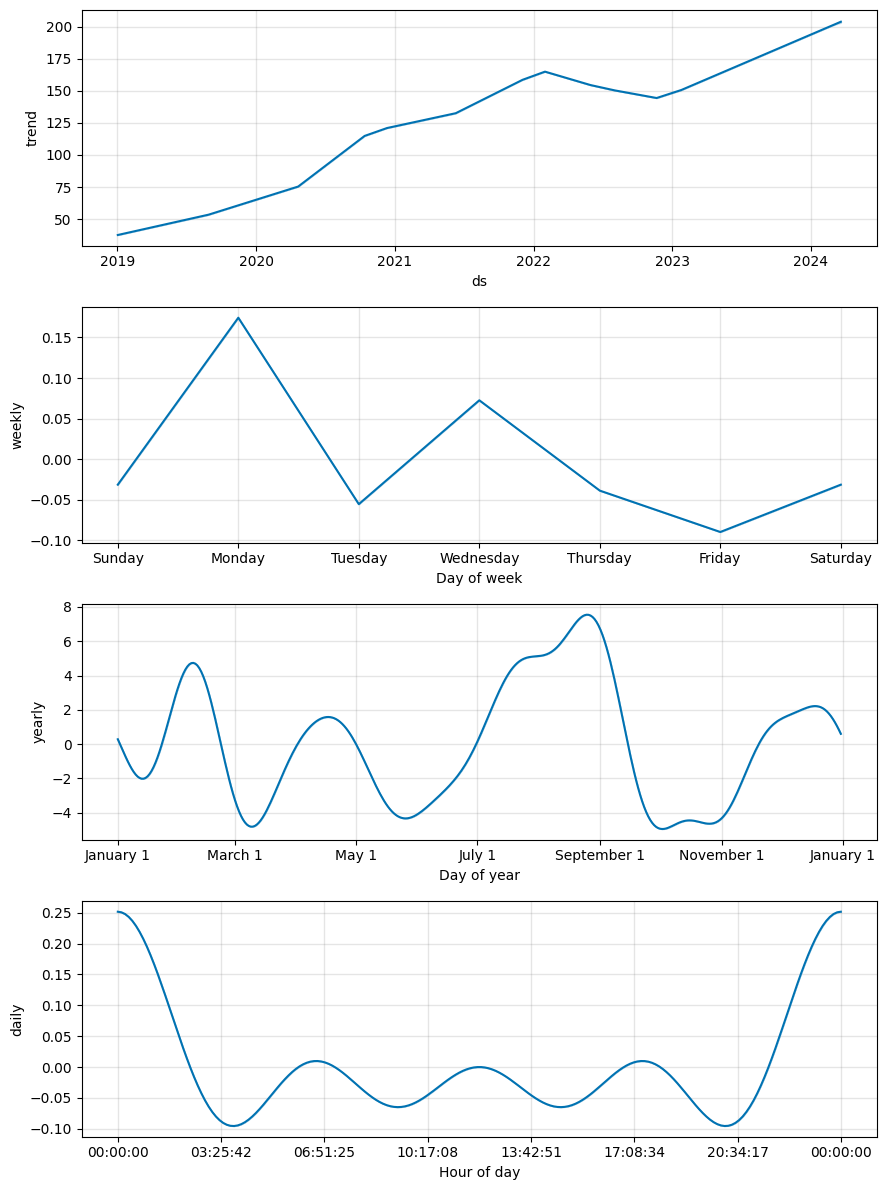

In [9]:
model.plot_components(forecast)

In [10]:
y_pred = forecast['yhat'][1278:].values

In [11]:
test = pd.read_csv('AAPL_test.csv')
y_true = test['Adj Close'].values

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math
import numpy as np

In [15]:
print('RMSE: {}'.format(round(mean_squared_error(y_true, y_pred, squared=False), 3)))
print('R^2 score: {}'.format(round(r2_score(y_true, y_pred), 3)))
mse = mean_squared_error(y_true, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
print('MAPE: '+str(mape))

RMSE: 24.092
R^2 score: -11.201
MSE: 580.4220001869844
MAE: 23.477105769664252
RMSE: 24.09194886651938
MAPE: 0.13394253313238322


c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



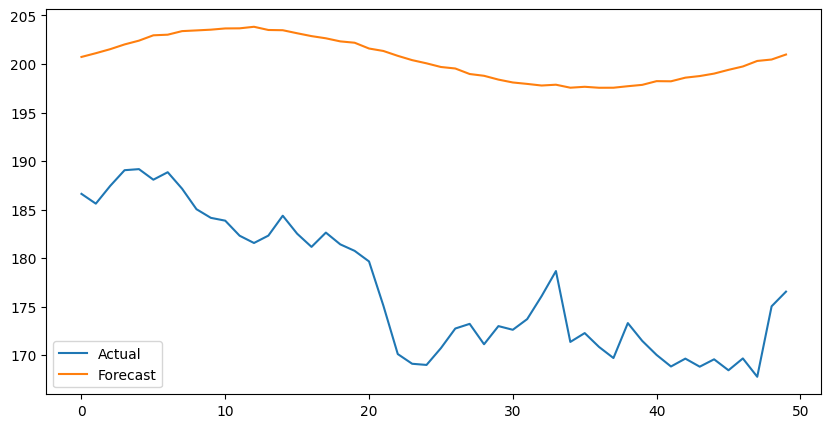

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_true,label = 'Actual')
plt.plot(y_pred,label = 'Forecast')
plt.legend()